<a href="https://colab.research.google.com/github/FrankArcosAnselmo/mI_lab01_Fa/blob/develop/Lab06_MINERIA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 6
 NOMBRE: ARCOS ANSELMO, FRANK FERNANDO RODOLFO

A)Lea la base de datos, realice imputaciones, tratamiento de outliers y transformaciones de datos
en caso sea necesario. Además, separe la variable de clasificación del resto de variables para
luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columnas = ["ID", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape", "Marginal_Adhesion",
            "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]
df = pd.read_csv(url, names=columnas)
df

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [12]:
# Reemplazar '?' por NaN y convertir a números
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.drop('ID', axis=1, inplace=True)

In [14]:
# Variables y etiquetas
X = df.drop('Class', axis=1)
y = df['Class']

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split (25% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)



B) Genere el modelo k-NN y determine la cantidad de vecinos más adecuada con el método gráfico
visto en clase. Además, calcule las métricas de clasificación que se implementaron en la parte
práctica e interprete sus resultados más importantes.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [16]:
# Probar distintos valores de k
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)


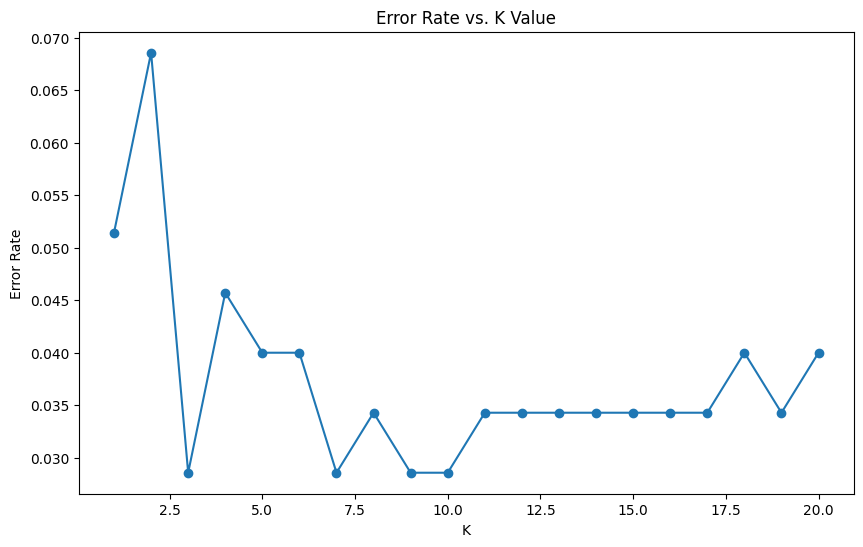

In [17]:
# Gráfico para elegir k óptimo
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rates, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [18]:
# Elegir el mejor k (ejemplo: k=5)
k_optimo = 5
knn_model = KNeighborsClassifier(n_neighbors=k_optimo)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [19]:
# Evaluación del modelo
print("Métricas para modelo sin balancear:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Métricas para modelo sin balancear:
[[116   2]
 [  5  52]]
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       118
           4       0.96      0.91      0.94        57

    accuracy                           0.96       175
   macro avg       0.96      0.95      0.95       175
weighted avg       0.96      0.96      0.96       175



C) Realice un balanceo de clases mediante la técnica SMOTE, vuelva a generar el modelo de
clasificación, calcule sus métricas y compárelas con las del modelo sin balancear para ver si
hubo o no mejoras.

In [20]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Nuevo modelo con datos balanceados
knn_smote = KNeighborsClassifier(n_neighbors=k_optimo)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = knn_smote.predict(X_test)

# Evaluación del modelo con SMOTE
print("Métricas para modelo con SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Métricas para modelo con SMOTE:
[[116   2]
 [  2  55]]
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       118
           4       0.96      0.96      0.96        57

    accuracy                           0.98       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175

